# Case study logistic regression
(see Exercise 4.8.13)

This question should be answered using the Weekly data set, which is part of the `ISLP` package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
# import all needed packages
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the data
Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


Here is an explanation of the variables:
- `Year`: The year that the observation was recorded
- `Lag1`: Percentage return for previous week
- `Lag2`: Percentage return for 2 weeks previous
- `Lag3`: Percentage return for 3 weeks previous
- `Lag4`: Percentage return for 4 weeks previous
- `Lag5`: Percentage return for 5 weeks previous
- `Volume`: Volume of shares traded (average number of daily shares traded in billions)
- `Today`: Percentage return for this week
- `Direction`: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.

## Task 1:
Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [4]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


**Observations**:
- Summary statistics for variables `Lag1` through `Lag5` are almost identical. This is because the `Lag` columns are shifted versions of each other with differences only for the first 5 and the last 5 observations.
- The standard deviation of the return (about 2.35%) is about an order of magnitude higher than the mean return (about 0.15%).

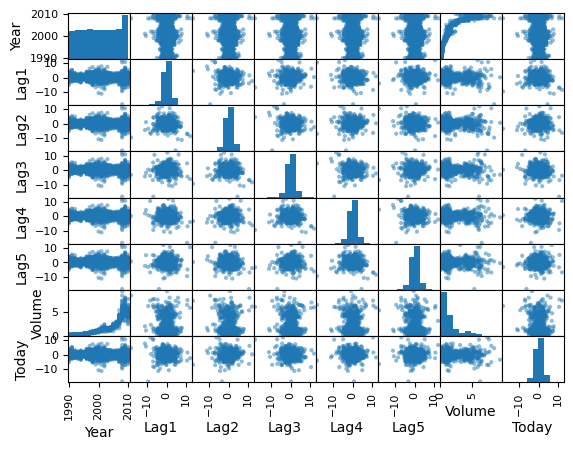

In [5]:
pd.plotting.scatter_matrix(Weekly);

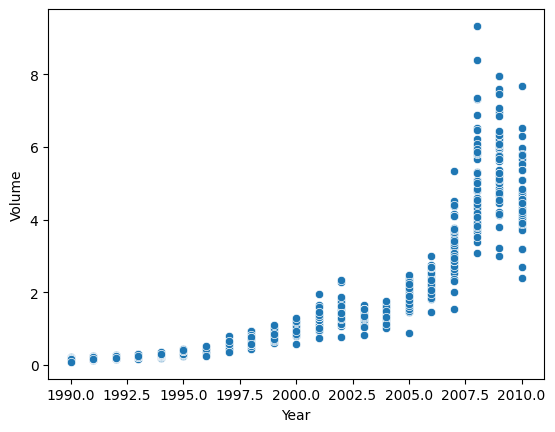

In [6]:
# Scatter plot for Year and Volume
sns.scatterplot(x=Weekly.Year, y = Weekly.Volume);

**Obervation**: The weekly trade volume has been constantly increasing over the last 20 years.

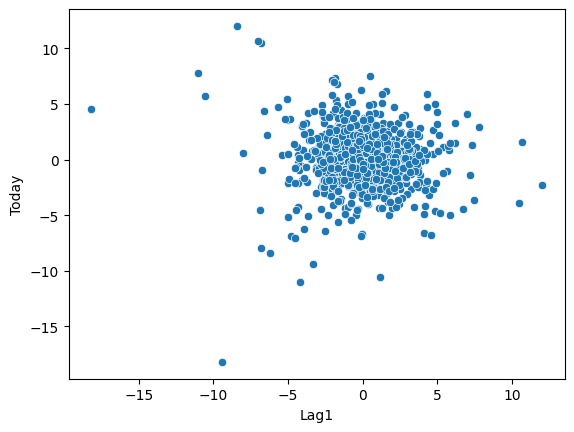

In [7]:
# Scatter plot for Lag1 and Today
sns.scatterplot(x=Weekly.Lag1, y = Weekly.Today);

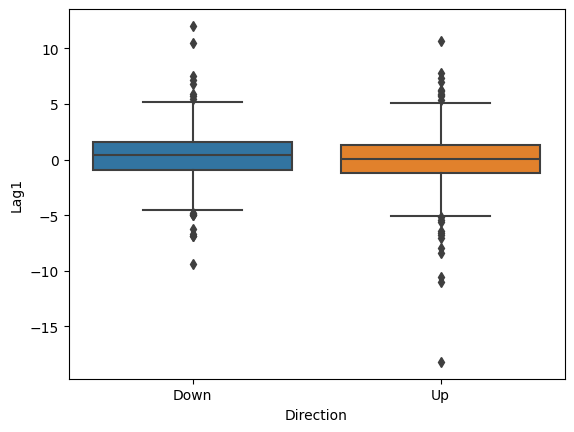

In [8]:
sns.boxplot(data = Weekly, x="Direction", y="Lag1");

There seems not to be a very strong relationship between `Direction` and `Lag`. If it all, one can say that the return of the week before (`Lag1`) tends to be slightly higher if the trend in the current week is negative and vice versa.

## Task 2:
Use the full data set to perform a logistic regression with `Direction` as the response and the five `lag` variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

Please refer to the [Section "Logistic Regression" of the Lab of Section 4](https://islp.readthedocs.io/en/latest/labs/Ch04-classification-lab.html#logistic-regression) of our textbook for details on how to implement logistic regression using `statsmodels`.

In [9]:
# Step 1: Create design matrix
from ISLP.models import ModelSpec as MS
predictors = Weekly.columns.drop(['Year', 'Today', 'Direction'])
design = MS(predictors).fit(Weekly)
X = design.transform(Weekly)
X

,intercept,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,1.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976
1,1.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574
2,1.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837
3,1.0,3.514,-2.576,-0.270,0.816,1.572,0.161630
4,1.0,0.712,3.514,-2.576,-0.270,0.816,0.153728
...,...,...,...,...,...,...,...
1084,1.0,-0.861,0.043,-2.173,3.599,0.015,3.205160
1085,1.0,2.969,-0.861,0.043,-2.173,3.599,4.242568
1086,1.0,1.281,2.969,-0.861,0.043,-2.173,4.835082
1087,1.0,0.283,1.281,2.969,-0.861,0.043,4.454044


In [10]:
# Step 2: Create response vector
y = Weekly.Direction.map(
    {'Up' : 1,
     'Down' : 0}
)
y

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

In [11]:
# Step 3: Create  model
model = sm.Logit(y,X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                0.006580
Time:                        17:08:34   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

**Question**: What is the meaning of the coefficient for `Lag1` to be -0.0413?

How do we compute probabilities based on predictor values Lag1,Lag2, Lag3, ...

$$p = \frac{1}{1+e^{-\left(\theta_0 - 0.0413 \cdot \text{Lag}_1 + \ldots\right)}}.$$


Positive value for Lag1 --> decrease in my probability $p$

Negative value for Lag1 --> increase in my probability $p$

## Task 3
Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [13]:
# Step 1: compute the predicted probabilities
predicted_probabilities = results.predict()
predicted_probabilities

array([0.60862494, 0.60103144, 0.58756995, ..., 0.57972297, 0.55091703,
       0.52212163])

In [14]:
# Step 2: transform predicted probabilities into predicted labels (0 or 1)
predicted_labels = np.where(predicted_probabilities > 0.5, 'Up', 'Down')
predicted_labels

array(['Up', 'Up', 'Up', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [31]:
# alternative method
predicted_labels_2 = np.array(['Down']*1089)
predicted_labels_2[predicted_probabilities>0.5] = "Up"

In [16]:
from ISLP import confusion_table
confusion_table(predicted_labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [17]:
# accuracy
np.mean(predicted_labels == Weekly.Direction)

0.5610651974288338

## Task 4:
### 4.1
Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. 

In [33]:
# Step 1: Split data into train and test set
train = Weekly[Weekly.Year <= 2008].copy()
test = Weekly[Weekly.Year > 2008].copy()

In [34]:
# Step 2: Create design matrix and response vector
predictors = ['Lag2']
design = MS(predictors).fit(train)
X = design.transform(train)
y = train.Direction.map({
    'Up' : 1,
    'Down' : 0
})

In [35]:
# Step 3: Train model
model = sm.Logit(y,X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                0.003076
Time:                        18:38:50   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

### 4.2 
Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [36]:
# create test design matrix
X_test = design.transform(test)

# create test response vector
y = test.Direction.map({
    'Up' : 1,
    'Down' : 0
})

In [38]:
# confusion table
predicted_probabilities = results.predict(X_test)
predicted_labels = round(predicted_probabilities)
confusion_table(predicted_labels,y)

Truth,0.0,1.0
Predicted,,
0.0,9,5
1.0,34,56


In [39]:
# fraction of correct predictions
np.mean(predicted_labels == y)

0.625

## Task 5 (not discussed in class):
Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, transformations, and associated confusion matrix that appears to provide the best results on the held out data.

In [6]:
# your answer here